In [1]:
text = "Tokenizing Text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 'T', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [2]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}

In [3]:
token2idx

{' ': 0,
 '.': 1,
 'L': 2,
 'N': 3,
 'P': 4,
 'T': 5,
 'a': 6,
 'c': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'i': 11,
 'k': 12,
 'n': 13,
 'o': 14,
 'r': 15,
 's': 16,
 't': 17,
 'x': 18,
 'z': 19}

In [4]:
input_ids = [token2idx[token] for token in tokenized_text]

In [5]:
input_ids

[5,
 14,
 12,
 8,
 13,
 11,
 19,
 11,
 13,
 10,
 0,
 5,
 8,
 18,
 17,
 0,
 11,
 16,
 0,
 6,
 0,
 7,
 14,
 15,
 8,
 0,
 17,
 6,
 16,
 12,
 0,
 14,
 9,
 0,
 3,
 2,
 4,
 1]

In [6]:
import pandas as pd
categorical_df = pd.DataFrame(
    {
        "Name": ["Bumblebee", "Optimus Prime", "Megatron"],
        "Label ID": [0, 1, 2]
    }
)

In [7]:
categorical_df.head()

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [8]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


In [9]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [10]:
print("token", tokenized_text[0])
print("텐서 인덱스", input_ids[0])
print("원핫표현", one_hot_encodings[0])

token T
텐서 인덱스 tensor(5)
원핫표현 tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [11]:
#2.2.2 단어 토큰화

tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'Text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


In [12]:
# subword tokenization
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [13]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [14]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)

In [16]:
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [17]:
# 처음과 끝에 "CLS", "SEP 토큰이 추가.
# 문자앞의 #은 앞문자열이 공백이 아님을 뜻함.
print(tokenizer.convert_tokens_to_string(tokens)) # 다시 합치는 메서드

[CLS] tokenizing text is a core task of nlp. [SEP]


In [18]:
tokenizer.vocab_size

30522

In [19]:
tokenizer.model_max_length

512

In [20]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

In [21]:
# 2.2.4 전체 데이터셋의 토큰화

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)
  # padding -> 긴 샘플 크기에 맞추어 패딩
  # truncation -> 모델의 최대 문맥 크기에 맞추어 샘플을 잘라냄.

In [22]:
!pip install datasets
from datasets import load_dataset
emotions = load_dataset("emotion")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [23]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


- attention mask: 입력에서 패딩처리된 부분을 무시함.
- 특수토큰 idx: [PAD]: 0, [UNK]: 100, [CLS]:101, [SEP]: 102, [MASK]: 103

In [24]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


In [25]:
from transformers import AutoModel
import torch

In [26]:
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [27]:
# 마지막 은닉상태의 추출

text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
# return tentors -> 텐서를 반환.
print(f"입력 텐서 크기: {inputs['input_ids'].size()}")

입력 텐서 크기: torch.Size([1, 6])


In [28]:
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [29]:
inputs = {
    k:v.to(device) for k, v in inputs.items()
}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [30]:
outputs.last_hidden_state.size() # batch_size, n_tokens, hidden_dim

torch.Size([1, 6, 768])

In [31]:
outputs.last_hidden_state[:,0].size() # 문자열의 마지막 hidden_state (양방향이라서 이거 쓰는 듯? 아직은 잘모르겠음..)

torch.Size([1, 768])

In [32]:
def extract_hidden_states(batch):
  inputs = {
      k:v.to(device) for k, v in batch.items()
      if k in tokenizer.model_input_names
  }
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return{
      "hidden_state": last_hidden_state[:,0].cpu().numpy()
  }

In [33]:
emotions_encoded.set_format("torch",
                           columns=["input_ids", "attention_mask", "label"])
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # batch_size = 1000 *default value

In [34]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [35]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(X_train.shape)
print(X_valid.shape)

(16000, 768)
(2000, 768)


In [36]:
!pip install umap-learn
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

In [37]:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])

In [38]:
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.291676,6.708169,0
1,-3.305009,6.058021,0
2,4.716852,3.198175,3
3,-2.713449,4.091769,2
4,-3.554915,4.159000,3


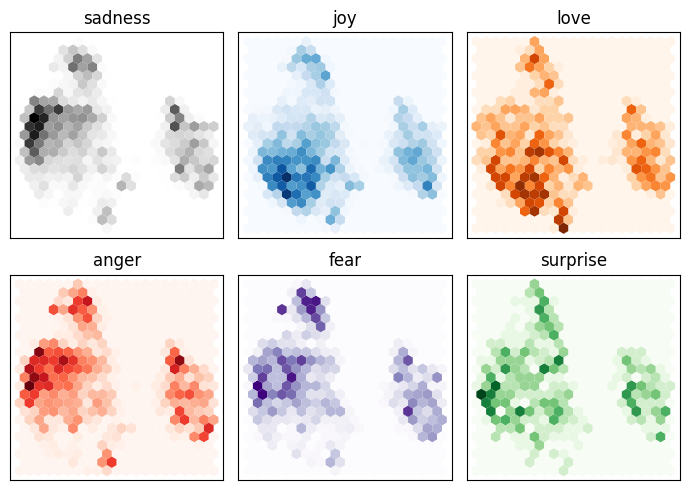

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(7, 5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
  df_emb_sub = df_emb.query(f"label == {i}")
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                 gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [40]:
#sklearn의 회귀 모델을 이용한 분류
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [41]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

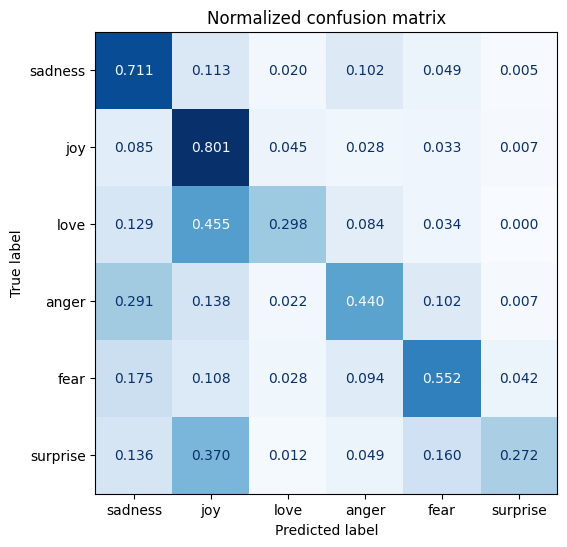

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true") # normalize => 확률로 바꾸어 출력
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", ax=ax, colorbar=False, values_format=".3f")
  plt.title("Normalized confusion matrix")
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [43]:
"""처리과정 요약

#함수들

def tokenize(batch):
  return tokenizer(batch["text"], padding=True, truncation=True)

def extract_hidden_states(batch):
  inputs = {
      k:v.to(device) for k, v in batch.items()
      if k in tokenizer.model_input_names
  }
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return{
      "hidden_state": last_hidden_state[:,0].cpu.numpy()
  }

#실제코드 파이프라인

from datasets import load_dataset
from tranformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

emotions = load_dataset("emotion")

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded.set_format("torch",
                           columns=["input_ids", "attention_mask", "label"])

emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # batch_size = 1000 *default value


"""

'처리과정 요약\n\n#함수들\n\ndef tokenize(batch):\n  return tokenizer(batch["text"], padding=True, truncation=True)\n\ndef extract_hidden_states(batch):\n  inputs = {\n      k:v.to(device) for k, v in batch.items()\n      if k in tokenizer.model_input_names\n  }\n  with torch.no_grad():\n    last_hidden_state = model(**inputs).last_hidden_state\n  return{\n      "hidden_state": last_hidden_state[:,0].cpu.numpy()\n  }\n\n#실제코드 파이프라인\n\nfrom datasets import load_dataset\nfrom tranformers import AutoTokenizer\n\nmodel_ckpt = "distilbert-base-uncased\ntokenizer = AutoTokenizer.from_pretrained(model_ckpt)\n\nemotions = load_dataset("emotion")\n\nemotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)\nemotions_encoded.set_format("torch",\n                           columns=["input_ids", "attention_mask", "label"])\n\nemotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True) # batch_size = 1000 *default value\n\n\n'

In [44]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification.
         from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {
      "accuracy" : acc,
      "f1" : f1
  }

In [57]:
from huggingface_hub import notebook_login

notebook_login()

In [53]:
from transformers import Trainer, TrainingArguments

In [48]:
!pip install  transformers[torch]
!pip install accelerate

In [54]:
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(
    output_dir = model_name,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True,
    save_strategy="epoch",
    load_best_model_at_end=True,
    log_level="error"
)

In [59]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.785800,0.293831,0.912000,0.911314
2,0.232400,0.209600,0.927000,0.927057


TrainOutput(global_step=500, training_loss=0.5091060943603516, metrics={'train_runtime': 232.0144, 'train_samples_per_second': 137.922, 'train_steps_per_second': 2.155, 'total_flos': 720342861696000.0, 'train_loss': 0.5091060943603516, 'epoch': 2.0})

In [61]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [62]:
preds_output.metrics

{'test_loss': 0.2095997929573059,
 'test_accuracy': 0.927,
 'test_f1': 0.9270573315969634,
 'test_runtime': 4.0008,
 'test_samples_per_second': 499.897,
 'test_steps_per_second': 7.998}

In [63]:
y_preds = np.argmax(preds_output.predictions, axis=1)

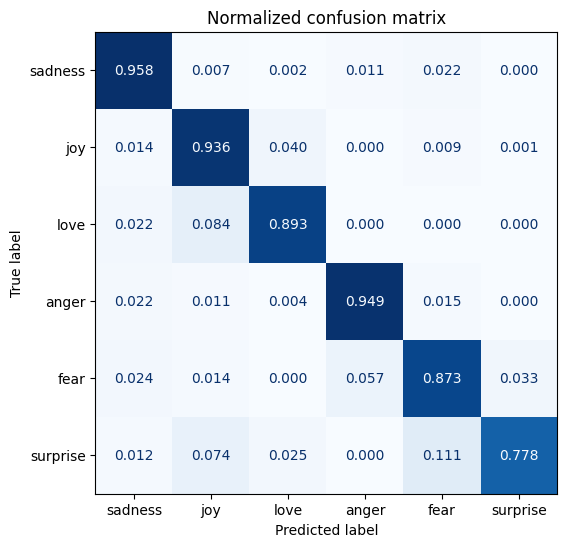

In [64]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [66]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  inputs = {
      k:v.to(device) for k, v in batch.items()
      if k in tokenizer.model_input_names
  }

  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device),
                        reduction="none")
  return {
      "loss": loss.cpu().numpy(),
      "predicted_label":pred_label.cpu().numpy()
  }

In [68]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

In [69]:
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16
)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [71]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [73]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))


In [74]:
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.019829
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.025492
2,i feel like a faithful servant,love,love,0.413041
3,i am just feeling cranky and blue,anger,anger,0.031711
4,i can have for a treat or if i am feeling festive,joy,joy,0.018995


In [75]:
df_test.sort_values("loss", ascending=False).head(n=10)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,5.729620
1963,i called myself pro life and voted for perry w...,joy,sadness,5.476160
1801,i feel that he was being overshadowed by the s...,love,sadness,5.382604
882,i feel badly about reneging on my commitment t...,love,sadness,5.214354
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.164559
1500,i guess we would naturally feel a sense of lon...,anger,sadness,5.120715
1274,i am going to several holiday parties and i ca...,joy,sadness,4.889289
1111,im lazy my characters fall into categories of ...,joy,fear,4.691986
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.685135
1509,i guess this is a memoir so it feels like that...,joy,fear,4.641492


In [78]:
df_test.sort_values("loss", ascending=True).head(50)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.015134
669,i am not feeling very joyful today its been a ...,joy,joy,0.015251
260,i am feeling so invigorated and so ready to ke...,joy,joy,0.015625
1657,i get up to refill my coffee and feel that ple...,joy,joy,0.015702
1147,i type i feel bouncy and excited to get out my...,joy,joy,0.015881
1205,i log on feeling vaguely sociable and after a ...,joy,joy,0.016089
876,i feel like the cool mom,joy,joy,0.016142
11,i was dribbling on mums coffee table looking o...,joy,joy,0.016194
1263,i feel this way about blake lively,joy,joy,0.016196
632,i feel he is an terrific really worth bet,joy,joy,0.016213


In [77]:
# 가장 손실이 큰 샘플과 가장 작은 샘플을 들여다보는 일을 진행함으로써 개선점에 대한 인사이트를 얻을 수 있다.

In [79]:
trainer.push_to_hub(commit_message="Training completed!")

events.out.tfevents.1711724374.c2b9f02dfc82.9196.0:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/blue2959/distilbert-base-uncased-finetuned-emotion/commit/ac85c089c693648e82c8ef98c9c73a23b2c8cf7f', commit_message='Training completed!', commit_description='', oid='ac85c089c693648e82c8ef98c9c73a23b2c8cf7f', pr_url=None, pr_revision=None, pr_num=None)

In [80]:
from transformers import pipeline

model_id = "blue2959/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [86]:
# custom tweet 내용을 바꾸어 감정 예측이 가능.
custom_tweet = "Yesterday, I watched Tom Cruise's performance and the heroine's intense fight scene. This time travel-themed movie has a solid storyline and gorgeous visuals."
preds = classifier(custom_tweet, top_k=None)

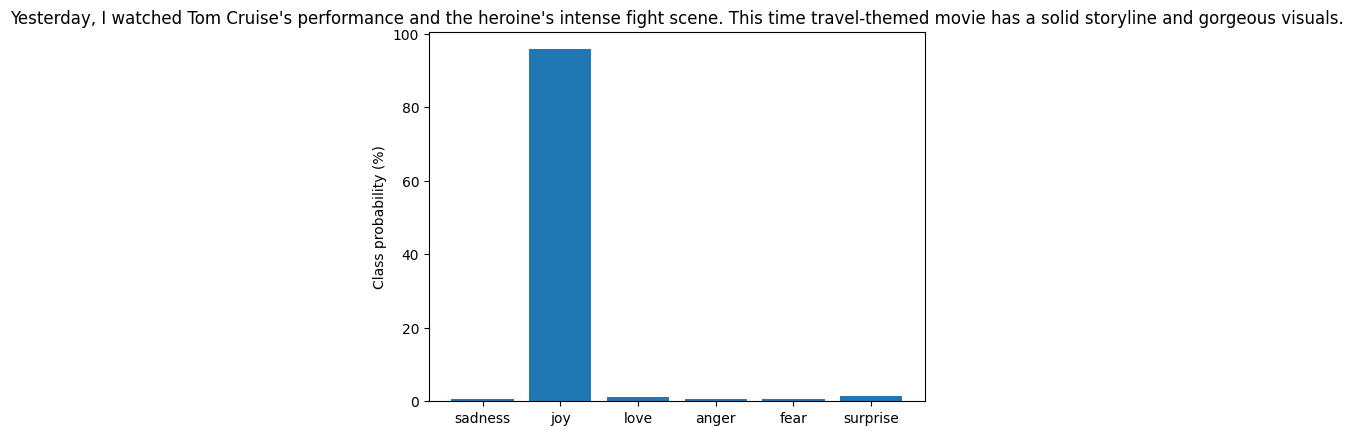

In [87]:
preds_sorted = sorted(preds, key=lambda d: d["label"])
preds_df = pd.DataFrame(preds_sorted)
plt.bar(labels, 100 * preds_df["score"], color="C0")
plt.title(f"{custom_tweet}")
plt.ylabel("Class probability (%)")
plt.show()